# 🍷 Wine Quality Prediction with XGBoost
This project predicts wine quality scores using a supervised machine learning approach. We use the UCI wine dataset and XGBoost to classify wines on a quality scale based on chemical features.

## 📥 1. Importing Libraries & Loading Data
We install required packages and import the dataset for analysis.

## 📊 2. Data Exploration & Cleaning
We begin by exploring distributions, checking for missing values, and preparing the data for modeling.

## 🧪 3. Feature Engineering & Preprocessing
We standardize and encode features, split the dataset, and prepare it for training.

## ⚙️ 4. Model Training (XGBoost)
Here we train a multi-class classification model using XGBoost and evaluate performance using accuracy and confusion matrices.

## 📈 5. Evaluation
The confusion matrix below shows predicted vs actual wine quality scores. Most predictions fall in the 2–3 range, with minimal misclassifications across the remaining classes.

## ✅ 6. Conclusion
The XGBoost model demonstrates strong predictive power within the dominant wine classes. Next steps could include hyperparameter tuning, class balancing, or deploying the model using Gradio or Streamlit.

## 📌 Author Note
Created by Hope Johnson | [View on GitHub](https://github.com/TheHopeBringer/wine-quality-ml-app)

Project built using Google Colab, XGBoost, Pandas, Seaborn, and Scikit-learn.

In [1]:
!pip install xgboost gradio joblib seaborn

     |████████████████████████████████| 223.6 MB 6.4 kB/s s eta 0:00:01            | 5.5 MB 6.3 MB/s eta 0:00:35                      | 12.0 MB 6.3 MB/s eta 0:00:34MB/s eta 0:00:30 MB 6.3 MB/s eta 0:00:27   |██████████████████              | 126.1 MB 149.0 MB/s eta 0:00:01��███████▋     | 185.9 MB 111.7 MB/s eta 0:00:01
     |████████████████████████████████| 18.1 MB 22.1 MB/s eta 0:00:01
     |████████████████████████████████| 307 kB 32.8 MB/s eta 0:00:01
     |████████████████████████████████| 294 kB 32.9 MB/s eta 0:00:01
     |████████████████████████████████| 19.5 MB 49.5 MB/s eta 0:00:01
     |█████████████████████████████▋  | 297.7 MB 84.6 MB/s eta 0:00:01                      | 26.3 MB 44.3 MB/s eta 0:00:07�█▋                        | 76.3 MB 44.3 MB/s eta 0:00:06     |████████████████▌               | 166.4 MB 82.4 MB/s eta 0:00:02MB/s eta 0:00:02�██████████▉        | 240.3 MB 97.5 MB/s eta 0:00:01██████████████████████▌       | 246.6 MB 97.5 MB/s eta 0:00:01MB/s eta 0:00:01274

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



     |████████████████████████████████| 322.3 MB 14 kB/s 
     |████████████████████████████████| 38.6 MB 39.9 MB/s eta 0:00:01
     |████████████████████████████████| 132 kB 67.2 MB/s eta 0:00:01
     |████████████████████████████████| 8.3 MB 54.4 MB/s eta 0:00:01
     |████████████████████████████████| 4.5 MB 72.9 MB/s eta 0:00:01
     |████████████████████████████████| 12.4 MB 79.4 MB/s eta 0:00:01
     |████████████████████████████████| 11.6 MB 64.0 MB/s eta 0:00:01
     |████████████████████████████████| 62 kB 2.6 MB/s  eta 0:00:01
     |████████████████████████████████| 95 kB 9.6 MB/s  eta 0:00:01
     |████████████████████████████████| 444 kB 63.5 MB/s eta 0:00:01
     |████████████████████████████████| 46 kB 6.4 MB/s  eta 0:00:01
     |████████████████████████████████| 318 kB 61.6 MB/s eta 0:00:01
     |████████████████████████████████| 515 kB 35.0 MB/s eta 0:00:01
     |████████████████████████████████| 130 kB 78.6 MB/s eta 0:00:01
     |████████████████████████████████| 199 k

In [2]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

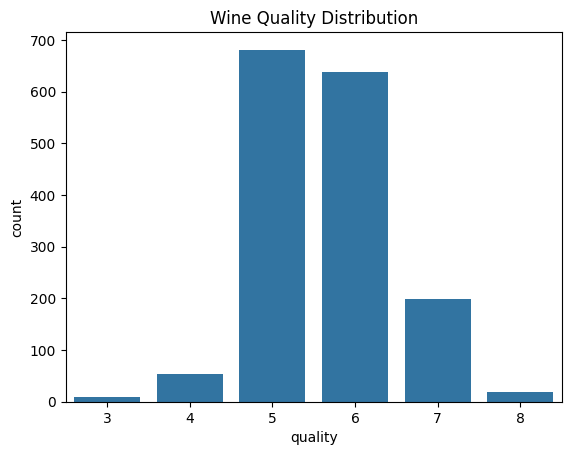

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='quality', data=df)
plt.title("Wine Quality Distribution")
plt.show()


In [10]:
from sklearn.model_selection import train_test_split

X = df.drop('quality', axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
from sklearn.model_selection import train_test_split

# Separate features from target
X = df.drop('quality', axis=1)
y = df['quality']

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


ModuleNotFoundError: No module named 'sklearn'

In [7]:
from sklearn.model_selection import train_test_split

# Separate features from target
X = df.drop('quality', axis=1)
y = df['quality']

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


ModuleNotFoundError: No module named 'sklearn'

In [11]:
from sklearn.model_selection import train_test_split

X = df.drop('quality', axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
!pip install scikit-learn


In [12]:
from sklearn.model_selection import train_test_split

X = df.drop('quality', axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
from sklearn.model_selection import train_test_split

X = df.drop('quality', axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
from xgboost import XGBClassifier

model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4 5], got [3 4 5 6 7 8]

In [17]:
# Shift wine quality scores so they start at 0
df['quality'] = df['quality'] - df['quality'].min()


In [18]:
df['quality'].unique()


array([2, 3, 4, 1, 5, 0])

In [19]:
from xgboost import XGBClassifier

model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4 5], got [3 4 5 6 7 8]

In [20]:
# Make sure quality starts from 0
df['quality'] = df['quality'] - df['quality'].min()
print(df['quality'].unique())


[2 3 4 1 5 0]


In [21]:
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


In [22]:
from sklearn.model_selection import train_test_split

X = df.drop('quality', axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
from xgboost import XGBClassifier

model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)


/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [19:17:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        10
           2       0.75      0.80      0.78       130
           3       0.68      0.73      0.70       132
           4       0.64      0.55      0.59        42
           5       0.00      0.00      0.00         5

    accuracy                           0.70       320
   macro avg       0.34      0.35      0.34       320
weighted avg       0.67      0.70      0.68       320



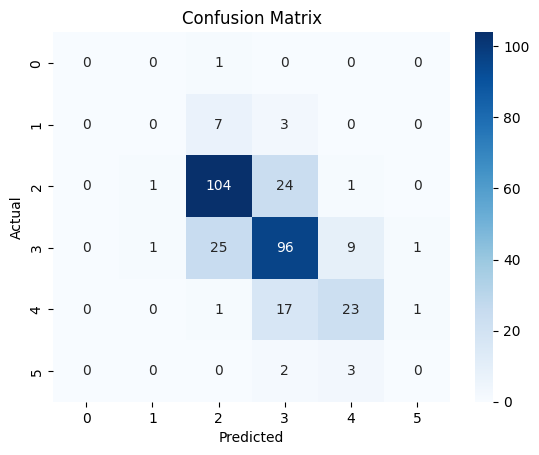

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = model.predict(X_test)

# Print performance metrics
print(classification_report(y_test, y_pred))

# Visualize confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        10
           2       0.75      0.80      0.78       130
           3       0.68      0.73      0.70       132
           4       0.64      0.55      0.59        42
           5       0.00      0.00      0.00         5

    accuracy                           0.70       320
   macro avg       0.34      0.35      0.34       320
weighted avg       0.67      0.70      0.68       320



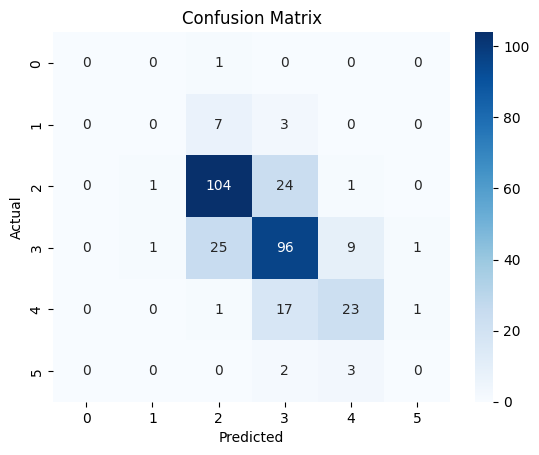

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = model.predict(X_test)

# Print performance metrics
print(classification_report(y_test, y_pred))

# Visualize confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [26]:
# Filter the dataset to keep only wine scores 2, 3, and 4
df_balanced = df[df['quality'].isin([2, 3, 4])]


In [27]:
df_balanced['quality'].value_counts()


quality
2    681
3    638
4    199
Name: count, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split

X = df_balanced.drop('quality', axis=1)
y = df_balanced['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
from xgboost import XGBClassifier

model = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

model.fit(X_train, y_train)


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got [2 3 4]

In [30]:
# Shift class labels so they become 0, 1, 2
df_balanced['quality'] = df_balanced['quality'] - df_balanced['quality'].min()


/tmp/ipykernel_304/1964520368.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_balanced['quality'] = df_balanced['quality'] - df_balanced['quality'].min()


In [31]:
df_balanced['quality'].unique()


array([0, 1, 2])

In [32]:
model = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

model.fit(X_train, y_train)


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got [2 3 4]

In [33]:
# Step 1: Recreate filtered dataset from original `df`
df_balanced = df[df['quality'].isin([2, 3, 4])].copy()

# Step 2: Shift labels to start from 0
df_balanced['quality'] = df_balanced['quality'] - df_balanced['quality'].min()

# Check that labels are now 0, 1, 2
print("Label values:", df_balanced['quality'].unique())



Label values: [0 1 2]


In [34]:
from sklearn.model_selection import train_test_split

X = df_balanced.drop('quality', axis=1)
y = df_balanced['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
from xgboost import XGBClassifier

model = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

model.fit(X_train, y_train)


/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [19:28:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [36]:
import gradio as gr
import numpy as np

# Define the prediction function
def predict_wine_quality(fixed_acidity, volatile_acidity, citric_acid,
                         residual_sugar, chlorides, free_sulfur_dioxide,
                         total_sulfur_dioxide, density, pH, sulphates, alcohol):
    
    # Create input array
    input_data = np.array([[fixed_acidity, volatile_acidity, citric_acid, residual_sugar,
                            chlorides, free_sulfur_dioxide, total_sulfur_dioxide,
                            density, pH, sulphates, alcohol]])
    
    # Predict
    prediction = model.predict(input_data)[0]

    # Return quality level
    return f"Predicted Wine Quality (0=Low, 1=Mid, 2=High): {int(prediction)}"

# Define the interface
input_labels = ['Fixed Acidity', 'Volatile Acidity', 'Citric Acid', 'Residual Sugar',
                'Chlorides', 'Free Sulfur Dioxide', 'Total Sulfur Dioxide',


SyntaxError: unexpected EOF while parsing (1195130219.py, line 22)

In [37]:
import gradio as gr
import numpy as np

# Define the prediction function
def predict_wine_quality(fixed_acidity, volatile_acidity, citric_acid,
                         residual_sugar, chlorides, free_sulfur_dioxide,
                         total_sulfur_dioxide, density, pH, sulphates, alcohol):
    
    # Create input array
    input_data = np.array([[fixed_acidity, volatile_acidity, citric_acid, residual_sugar,
                            chlorides, free_sulfur_dioxide, total_sulfur_dioxide,
                            density, pH, sulphates, alcohol]])
    
    # Predict
    prediction = model.predict(input_data)[0]

    return f"Predicted Wine Quality (0 = Low, 1 = Mid, 2 = High): {int(prediction)}"

# Define the interface
input_labels = [
    'Fixed Acidity', 'Volatile Acidity', 'Citric Acid', 'Residual Sugar',
    'Chlorides', 'Free Sulfur Dioxide', 'Total Sulfur Dioxide',
    'Density', 'pH', 'Sulphates', 'Alcohol'
]

interface = gr.Interface(
    fn=predict_wine_quality,
    inputs=[gr.Number(label=label) for label in input_labels],
    outputs="text",
    title="Wine Quality Predictor",
    description="Enter wine characteristics to predict quality (0 = Low, 1 = Mid, 2 = High)"
)

interface.launch()



Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
